<a href="https://colab.research.google.com/github/Ahmad162539/ML-class-excercise-codes/blob/main/Bigdata_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-12-8a8bee5597b6>:19: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.fillna(data.mean())


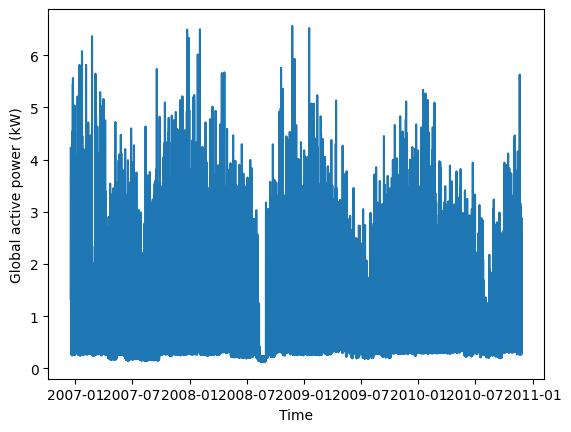

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv('/content/sample_data/Datasets/household_power_consumption.txt', delimiter=';', parse_dates={'DateTime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['?','nan'])

# Print the first few rows of the dataset
#print(data.head())

# Check for missing values
# print(data.isnull().sum())

# Fill missing values with the mean of the column
data = data.fillna(data.mean())

# Resample the data to hourly frequency
data = data.resample('H', on='DateTime').mean()

# Plot the active power consumption
plt.plot(data['Global_active_power'])
plt.xlabel('Time')
plt.ylabel('Global active power (kW)')
plt.show()


In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import pandas as pd
import numpy as np

# Load the dataset

# Load the dataset
data = pd.read_csv('/content/sample_data/Datasets/household_power_consumption.txt', delimiter=';', parse_dates={'DateTime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['?','nan'])

# Fill missing values with the mean of the column
data = data.fillna(data.mean())

# Resample the data to hourly frequency
data = data.resample('H', on='DateTime').mean()


# Convert the dataset to a PyTorch tensor
X = torch.tensor(data.drop("target_variable", axis=1).values, dtype=torch.float32)
y = torch.tensor(data["target_variable"].values, dtype=torch.float32)

# Define the model
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(X.shape[1], 1)
        
    def forward(self, x):
        out = self.linear(x)
        return out

model = RegressionModel()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if (epoch+1) % 100 == 0:
        print("Epoch [{}/{}], Loss: {:.4f}".format(epoch+1, num_epochs, loss.item()))

# Predict on new data
new_data = torch.tensor([[1.0, 2.0, 3.0]])
y_pred = model(new_data).item()
print("Prediction: ", y_pred)


<ipython-input-13-653547b7ecba>:13: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.fillna(data.mean())


KeyError: ignored